In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import acquire_plays_data
import prep_plays
import wrangle_plays_data
import wrangle_players
import re
plt.rc("figure", figsize=(12, 7))
plt.rc("font", size=14)

Acquire.py Loaded Successfully
Prep.py Loaded Successfully
Wrangle.py Loaded Successfully


In [2]:
df = pd.read_csv('players.csv')

In [3]:
df.head()

,nflId,height,weight,birthDate,collegeName,position,displayName
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell


In [4]:
df.describe()

,nflId,weight
count,1.303000e+03,1303.000000
mean,2.416518e+06,222.537222
std,5.333335e+05,29.476747
min,2.520000e+02,159.000000
25%,2.539662e+06,200.000000
50%,2.553658e+06,216.000000
75%,2.558184e+06,242.000000
max,2.561671e+06,352.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   nflId        1303 non-null   int64 
 1   height       1303 non-null   object
 2   weight       1303 non-null   int64 
 3   birthDate    1303 non-null   object
 4   collegeName  1303 non-null   object
 5   position     1303 non-null   object
 6   displayName  1303 non-null   object
dtypes: int64(2), object(5)
memory usage: 71.4+ KB


In [6]:
df.height.value_counts()

73      159
72      153
74      141
75      136
71      127
76       90
70       81
77       67
6-2      42
69       37
78       37
6-0      33
5-10     32
6-1      29
5-11     27
6-3      25
6-4      25
68       18
6-5      11
5-9       9
79        9
80        3
67        3
6-7       2
6-6       2
66        2
5-8       1
5-7       1
5-6       1
Name: height, dtype: int64

In [7]:
example = '5-10'

In [8]:
feet = int(re.findall(r'(\d+)-(\d+)', example)[0][0])
feet

5

In [9]:
inches = int(re.findall(r'(\d+)-(\d+)', example)[0][1])
inches

10

### Converts the heights from feet-inches into inches

In [10]:
def conv_height(value):
    if len(re.findall(r'(\d+)-(\d+)', value)) > 0:
        feet = int(re.findall(r'(\d+)-(\d+)', value)[0][0])
        inches = int(re.findall(r'(\d+)-(\d+)', value)[0][1])
        return (feet * 12) + inches
    else:
        return value

In [11]:
df['height'] = df.height.apply(conv_height)

In [12]:
df.head()

,nflId,height,weight,birthDate,collegeName,position,displayName
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell


In [13]:
df.birthDate.value_counts()

1989-04-26    4
1994-08-03    3
1993-04-10    3
1993-02-08    3
1995-11-17    3
             ..
1992-02-16    1
01/10/1993    1
1993-10-23    1
1991-10-14    1
1993-09-16    1
Name: birthDate, Length: 1150, dtype: int64

### Converting birthdate to datetime

In [14]:
df.birthDate = pd.to_datetime(df.birthDate)

In [15]:
# Creating a age column that takes the first date and subtracts the birthdate as a
df['age'] = (pd.to_datetime('09/06/2018') - df.birthDate).astype('<m8[Y]')

In [16]:
df.head()

,nflId,height,weight,birthDate,collegeName,position,displayName,age
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant,27.0
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford,29.0
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen,26.0
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones,23.0
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell,25.0


In [17]:
def prep_players():
    '''
    This function acquires the players csv and prepares
    it to merge with other csv's
    '''
    # Acquire the players csv
    df= pd.read_csv('players.csv')
    # Convert the birthdate to datetime to get rid of different date formats
    df.birthDate = pd.to_datetime(df.birthDate)
    # Creating a age column that takes the start date of the 2018 season and subtracts the birthdate
    df['age'] = (pd.to_datetime('09/06/2018') - df.birthDate).astype('<m8[Y]')
    # Function that converts heights
    def conv_height(value):
        if len(re.findall(r'(\d+)-(\d+)', value)) > 0:
            feet = int(re.findall(r'(\d+)-(\d+)', value)[0][0])
            inches = int(re.findall(r'(\d+)-(\d+)', value)[0][1])
            return (feet * 12) + inches
        else:
            return value
    # Changing height column to equal just inches
    df['height'] = df.height.apply(conv_height)
    return df

In [18]:
df= prep_players()

In [19]:
df.head()

,nflId,height,weight,birthDate,collegeName,position,displayName,age
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant,27.0
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford,29.0
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen,26.0
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones,23.0
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell,25.0


In [20]:
import prep_season

Prep_Season.py Loaded Successfully


In [21]:
df2 = prep_season.clean_season()

Dataframe Ready For Use


In [22]:
df2.head().T

,0,1,2,3,4
time,2018-09-07T01:07:19.700Z,2018-09-07T01:09:14.400Z,2018-09-07T01:09:55.200Z,2018-09-07T01:10:40.700Z,2018-09-07T01:12:42.000Z
x,96.1,54.77,55.38,56.59,18.59
y,27.82,29.86,27.42,25.89,25.33
s,0.99,0.86,0.86,2.66,2.19
a,1.14,1.16,0.04,1.92,0.98
dis,0.1,0.09,0.09,0.25,0.22
o,327.4,338.33,181.68,271.87,40.17
dir,311.41,58.53,180.92,304.04,54.47
pass_stopped,0,1,1,0,1
nflId,310,310,310,310,310


In [23]:
df2.describe()

,x,y,s,a,dis,o,dir,pass_stopped,nflId,jerseyNumber,...,playId,playDirection,week,height,weight,age,time_since_last_x,force_per_second,is_home,is_defense
count,238274.000000,238274.000000,238274.000000,238274.000000,238274.000000,238274.000000,238274.000000,238274.000000,2.382740e+05,238274.000000,...,238274.000000,238274.000000,238274.000000,238274.000000,238274.000000,238274.000000,238265.000000,238274.000000,238274.000000,238274.000000
mean,59.816581,26.715906,3.897872,2.375138,0.392555,181.104782,180.440161,0.372814,2.385147e+06,37.467819,...,2171.193311,0.501213,8.944526,73.014580,216.205348,26.018869,0.101376,35.351435,0.500491,0.564380
std,25.409364,12.763655,2.132761,1.319829,0.215795,105.374639,106.157873,0.483554,5.894212e+05,24.457008,...,1242.913968,0.500000,4.986982,2.369653,23.644817,3.480993,0.109951,19.320056,0.500001,0.495839
min,-3.460000,-9.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.520000e+02,1.000000,...,50.000000,0.000000,1.000000,66.000000,159.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,41.630000,17.260000,2.150000,1.360000,0.220000,93.830000,91.982500,0.000000,2.533062e+06,20.000000,...,1120.000000,0.000000,4.000000,71.000000,196.000000,23.000000,0.098900,19.674475,0.000000,0.000000
50%,59.790000,26.680000,3.880000,2.230000,0.390000,179.930000,180.260000,0.000000,2.552430e+06,29.000000,...,2162.000000,1.000000,9.000000,73.000000,212.000000,25.000000,0.100800,35.113500,1.000000,1.000000
75%,77.880000,36.160000,5.480000,3.210000,0.550000,270.720000,269.690000,1.000000,2.557969e+06,53.000000,...,3202.000000,1.000000,13.000000,75.000000,235.000000,28.000000,0.102400,49.568000,1.000000,1.000000
max,123.600000,60.630000,10.910000,12.520000,2.990000,360.000000,360.000000,1.000000,2.561671e+06,99.000000,...,5637.000000,1.000000,17.000000,80.000000,350.000000,41.000000,53.000000,132.346100,1.000000,1.000000


In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238274 entries, 0 to 238318
Data columns (total 28 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   time               238274 non-null  object 
 1   x                  238274 non-null  float64
 2   y                  238274 non-null  float64
 3   s                  238274 non-null  float64
 4   a                  238274 non-null  float64
 5   dis                238274 non-null  float64
 6   o                  238274 non-null  float64
 7   dir                238274 non-null  float64
 8   pass_stopped       238274 non-null  int64  
 9   nflId              238274 non-null  float64
 10  displayName        238274 non-null  object 
 11  jerseyNumber       238274 non-null  float64
 12  position           238274 non-null  object 
 13  frameId            238274 non-null  int64  
 14  gameId             238274 non-null  int64  
 15  playId             238274 non-null  int64  
 16  pl

In [25]:
#df2.dropna(axis=0, inplace=True)

In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238274 entries, 0 to 238318
Data columns (total 28 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   time               238274 non-null  object 
 1   x                  238274 non-null  float64
 2   y                  238274 non-null  float64
 3   s                  238274 non-null  float64
 4   a                  238274 non-null  float64
 5   dis                238274 non-null  float64
 6   o                  238274 non-null  float64
 7   dir                238274 non-null  float64
 8   pass_stopped       238274 non-null  int64  
 9   nflId              238274 non-null  float64
 10  displayName        238274 non-null  object 
 11  jerseyNumber       238274 non-null  float64
 12  position           238274 non-null  object 
 13  frameId            238274 non-null  int64  
 14  gameId             238274 non-null  int64  
 15  playId             238274 non-null  int64  
 16  pl

In [27]:
df2.pass_stopped.value_counts()

0    149442
1     88832
Name: pass_stopped, dtype: int64

In [28]:
df2.position.value_counts()

CB     48120
WR     47441
OLB    21087
TE     20419
FS     18438
QB     17407
RB     17324
SS     14364
ILB    12341
LB      7184
MLB     5880
DB      5123
S       1728
HB       595
FB       581
DE       143
DL        35
DT        28
LS        14
P         13
NT         6
K          3
Name: position, dtype: int64

In [29]:
X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle_players.train_validate_test(df2)
X_train.T

,209450,205638,230631,59627,151875,36015,121012,166183,173048,90136,...,184660,112034,170765,106643,11923,28101,142541,203490,138128,149727
time,2018-10-14T18:17:59.299Z,2018-10-08T03:20:30.799Z,2018-10-21T18:46:41.500Z,2018-12-09T18:08:17.200Z,2018-11-11T18:13:35.500Z,2018-09-23T17:11:17.500Z,2018-09-23T17:11:53.099Z,2018-09-23T22:08:02.299Z,2018-12-02T21:30:26.299Z,2018-12-16T19:49:17.900Z,...,2018-11-26T03:59:26.400Z,2018-12-30T23:37:51.500Z,2018-10-15T02:08:00.299Z,2018-10-28T19:14:55.200Z,2018-12-23T20:52:25.299Z,2018-10-28T18:19:22.400Z,2018-11-18T18:40:54.900Z,2018-11-02T01:16:08.599Z,2018-09-30T17:32:40.299Z,2018-09-21T03:11:08.799Z
x,72.69,61.09,91.39,19.71,62.53,89.06,95.28,47.77,94.45,107.91,...,18.31,40.59,56.72,89.96,55.27,27.47,26.15,43.71,55.76,20.75
y,34.43,24.83,26.99,13.06,29.93,8.38,39.53,14.9,16.86,48.49,...,24.93,19.27,47.94,24.66,13.04,8.91,41.12,31.98,18.28,25.56
s,3.89,7.4,0.16,6.16,2.93,4.47,2.48,8.05,5.18,1.46,...,4.37,1.85,3.38,0.79,2.29,3.91,4.91,5.91,3.95,5.36
a,4.36,2.4,1.3,3.13,2.08,3.26,4.14,2.46,2.56,1.03,...,0.86,2.21,4.01,2.82,2.97,3.49,2.08,3.67,1.08,0.86
dis,0.36,0.75,0.02,0.63,0.3,0.44,0.26,0.81,0.53,0.15,...,0.44,0.19,0.34,0.08,0.24,0.41,0.49,0.57,0.4,0.53
o,8.39,29.65,342.51,186.51,199.74,3.92,200.49,261.85,38.31,265.18,...,7.27,123.41,186.94,335.5,11.02,291.18,167.07,90.14,317.39,353.52
dir,318.18,26.88,202.55,226.92,191.49,24.49,3.66,278.37,162,287.51,...,281,114.34,324.54,287.15,142.9,263.63,163.4,109.59,338.1,311.99
pass_stopped,0,1,1,0,1,0,0,0,0,1,...,1,1,0,0,1,0,0,0,0,0
nflId,2.55788e+06,2.55792e+06,2.55539e+06,2.54377e+06,2.49534e+06,2.55811e+06,2.55344e+06,2.55819e+06,2.55231e+06,2.54116e+06,...,2.53282e+06,2.55344e+06,2.55535e+06,2.55789e+06,2.56113e+06,2.50806e+06,2.54029e+06,2.54374e+06,2.56076e+06,2.55532e+06


In [30]:
#df.drop(df.index[df['event'] == 'field_goal_fake'], inplace = True)

#X_train.drop(X_train.index[X_train['route'] == 'undefined'], inplace =True) 

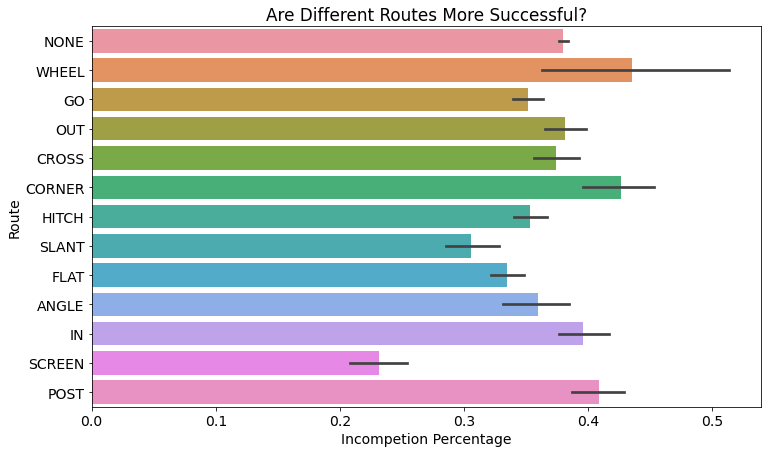

In [31]:
sns.barplot(data=X_train,x='pass_stopped', y='route')
plt.xlabel('Incompetion Percentage')
plt.ylabel('Route')
plt.title("Are Different Routes More Successful?")
plt.show()

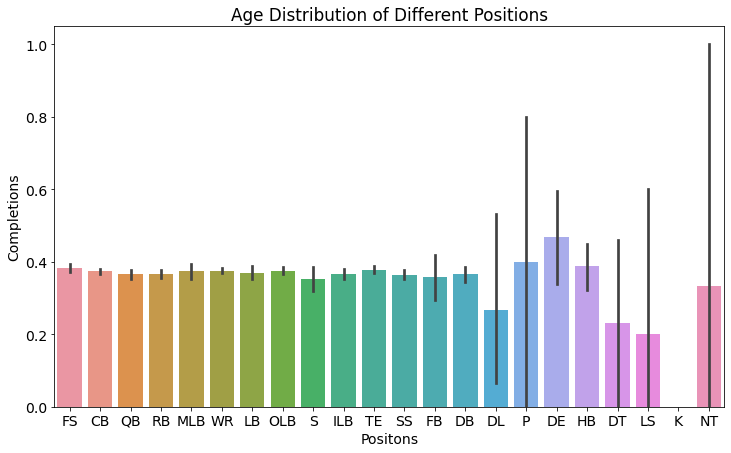

In [32]:
sns.barplot(data=X_train,x='position', y='pass_stopped')
plt.xlabel('Positons')
plt.ylabel('Completions')
plt.title("Age Distribution of Different Positions")
plt.show()

In [33]:
# Position and team speed aggregated
X_train.groupby(['position']).s.agg(['mean','count','min','max']).sort_values(by='mean',ascending =False)

,mean,count,min,max
position,,,,
K,6.250000,1,6.25,6.25
FS,4.404456,7818,0.06,9.98
DB,4.403140,2140,0.07,10.10
S,4.337763,733,0.05,9.71
SS,4.284860,6076,0.03,9.80
WR,4.267064,19783,0.00,10.45
CB,4.256609,20261,0.00,10.68
LB,4.183985,3006,0.10,9.84
MLB,4.147430,2471,0.16,9.77


In [34]:
# Position and pass stopped speed aggregated by speed
X_train.groupby(['position','pass_stopped']).s.agg(['mean','count','min','max']).sort_values(by='pass_stopped',ascending =True)

,,mean,count,min,max
position,pass_stopped,,,,
CB,0,4.396511,12690,0.01,10.68
TE,0,3.976673,5419,0.01,9.30
SS,0,4.441410,3859,0.03,9.80
S,0,4.378333,474,0.05,9.17
RB,0,3.762982,4594,0.05,9.63
QB,0,1.577974,4542,0.02,8.31
P,0,2.003333,3,1.43,2.43
OLB,0,3.723472,5548,0.02,9.79
NT,0,2.365000,2,1.11,3.62


In [35]:
# Position and pass stopped distance traveled aggregated by distance mean
X_train.groupby(['position','pass_stopped']).dis.agg(['mean','count','min','max']).sort_values(by='mean',ascending =False)

,,mean,count,min,max
position,pass_stopped,,,,
K,0,0.620000,1,0.62,0.62
LS,1,0.470000,1,0.47,0.47
WR,0,0.451775,12359,0.00,1.08
DB,0,0.449683,1358,0.00,1.00
FS,0,0.448025,4826,0.00,0.96
MLB,0,0.444386,1546,0.02,0.98
SS,0,0.442130,3859,0.00,0.98
CB,0,0.440614,12690,0.00,1.49
LB,0,0.438537,1893,0.01,0.99


In [36]:
# Position and pass stopped speed aggregated by accelaration
accelerations = X_train.groupby(['position','pass_stopped']).a.agg(['mean']).sort_values(by='mean',ascending =False)
accelerations

,,mean
position,pass_stopped,
K,0,3.270000
FS,0,2.918556
S,0,2.892996
SS,0,2.813561
DB,0,2.776355
CB,0,2.736765
ILB,0,2.621395
WR,0,2.593860
LB,0,2.571331


In [37]:
accelerations = accelerations.reset_index()
accelerations

,position,pass_stopped,mean
0,K,0,3.270000
1,FS,0,2.918556
2,S,0,2.892996
3,SS,0,2.813561
4,DB,0,2.776355
5,CB,0,2.736765
6,ILB,0,2.621395
7,WR,0,2.593860
8,LB,0,2.571331
9,DE,0,2.480606


In [38]:
accelerations = accelerations.pivot(index='position',columns='pass_stopped')['mean'] 
accelerations

pass_stopped,0,1
position,,
CB,2.736765,2.422539
DB,2.776355,2.378414
DE,2.480606,1.405517
DL,2.350000,1.300000
DT,2.076000,0.886667
FB,2.361712,2.047778
FS,2.918556,2.358272
HB,2.424400,1.833263
ILB,2.621395,2.144772


In [39]:
accel = accelerations[0]-accelerations[1].sort_values(ascending=False)
accel

position
CB     0.314227
DB     0.397941
DE     1.075089
DL     1.050000
DT     1.189333
FB     0.313935
FS     0.560284
HB     0.591137
ILB    0.476623
K           NaN
LB     0.467800
LS     0.147500
MLB    0.438675
NT     0.880000
OLB    0.559489
P      0.683333
QB    -0.140785
RB     0.298450
S      0.595853
SS     0.524851
TE     0.261516
WR     0.157119
dtype: float64

In [40]:
def accel_diff():
    accelerations = df2.groupby(['position','pass_stopped']).a.agg(['mean']).sort_values(by='mean',ascending =False)
    accelerations = accelerations.reset_index()
    accelerations = accelerations.pivot(index='position',columns='pass_stopped')['mean'] 
    accelerations = accelerations[0]-accelerations[1].sort_values(ascending=False)
    df3= pd.DataFrame(accelerations)
    df=pd.merge(df2,df3,how='inner', on='position')
    df=df.rename(columns = {'0':'accel_differential'})
    return df

In [41]:
accel_diff()

,time,x,y,s,a,dis,o,dir,pass_stopped,nflId,...,height,weight,birthDate,collegeName,age,time_since_last_x,force_per_second,is_home,is_defense,0
0,2018-09-07T01:07:19.700Z,96.10,27.82,0.99,1.14,0.10,327.40,311.41,0,310.0,...,76,217,1985-05-17,Boston College,33.0,0.1010,9.0890,0,0,-0.128503
1,2018-09-07T01:09:14.400Z,54.77,29.86,0.86,1.16,0.09,338.33,58.53,1,310.0,...,76,217,1985-05-17,Boston College,33.0,0.1047,7.8955,0,0,-0.128503
2,2018-09-07T01:09:55.200Z,55.38,27.42,0.86,0.04,0.09,181.68,180.92,1,310.0,...,76,217,1985-05-17,Boston College,33.0,0.1047,7.8955,0,0,-0.128503
3,2018-09-07T01:10:40.700Z,56.59,25.89,2.66,1.92,0.25,271.87,304.04,0,310.0,...,76,217,1985-05-17,Boston College,33.0,0.0940,24.4210,0,0,-0.128503
4,2018-09-07T01:12:42.000Z,18.59,25.33,2.19,0.98,0.22,40.17,54.47,1,310.0,...,76,217,1985-05-17,Boston College,33.0,0.1005,20.1060,0,0,-0.128503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238269,2018-12-18T02:59:55.099Z,46.67,29.84,4.51,1.30,0.49,69.73,75.45,1,2539296.0,...,75,315,1989-02-02,Purdue,29.0,0.1086,60.1048,1,1,1.123977
238270,2018-12-30T18:10:43.200Z,44.56,26.39,1.37,3.65,0.06,33.45,55.91,0,496816.0,...,76,300,1988-02-25,Oklahoma,30.0,0.0438,17.3886,1,1,1.123977
238271,2018-12-30T18:10:43.200Z,43.64,28.35,3.89,2.20,0.44,47.31,59.23,0,2560909.0,...,76,347,1995-02-05,Washington,23.0,0.1131,57.1086,1,1,1.123977
238272,2018-12-30T18:18:40.299Z,87.32,27.78,1.68,1.20,0.15,207.60,75.03,1,2506931.0,...,73,303,1983-06-10,Louisiana State,35.0,0.0893,21.5365,1,1,1.123977


In [42]:
#this function filters out the data to where the only observation
#will be the 'pass_forward' event
prep_plays.filter_nfl_weeks()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


In [43]:
#this function creates the shortest distance from the receiver 
#along with additional information
distance_df = prep_plays.combine_all_weeks_and_plays()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


In [44]:
distance_df.T

,0,1,2,3,4,5,6,7,8,9,...,16815,16816,16817,16818,16819,16820,16821,16822,16823,16824
playDescription,(15:00) M.Ryan pass short right to J.Jones pus...,(13:10) M.Ryan pass incomplete short right to ...,(13:05) (Shotgun) M.Ryan pass incomplete short...,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,(10:59) (Shotgun) M.Ryan pass incomplete short...,(10:10) (Shotgun) N.Foles pass short left to N...,(9:24) (Shotgun) N.Foles pass incomplete short...,(9:08) M.Ryan pass incomplete deep left to M.S...,(7:01) M.Ryan pass short left to T.Coleman pus...,(6:19) M.Ryan pass short left to A.Hooper to P...,...,(7:39) (Shotgun) P.Rivers pass incomplete shor...,(7:35) (Shotgun) P.Rivers pass short right to ...,(6:51) P.Rivers pass short right to J.Jackson ...,(2:54) (Shotgun) P.Rivers pass short left to A...,(2:40) (Shotgun) P.Rivers pass short left to K...,(2:19) (Shotgun) P.Rivers pass short right to ...,(2:00) (Shotgun) P.Rivers pass short left to K...,(1:41) (Shotgun) P.Rivers pass incomplete shor...,(1:37) (Shotgun) P.Rivers pass incomplete deep...,(1:31) (Shotgun) P.Rivers pass deep middle int...
quarter,1,1,1,1,1,1,1,1,1,1,...,4,4,4,4,4,4,4,4,4,4
down,1,1,2,3,3,2,3,1,2,1,...,2,3,1,1,1,2,1,1,2,3
yardsToGo,15,10,10,10,1,8,4,10,13,10,...,6,6,10,20,10,2,10,10,10,10
team_by_comp_yds,3,3,3,3,3,8,8,3,3,3,...,19,19,19,19,19,19,19,19,19,19
defendersInTheBox,7,7,6,6,8,7,6,7,8,8,...,6,6,6,6,6,6,4,5,4,6
numberOfPassRushers,4,4,4,5,6,4,4,4,4,3,...,6,5,4,5,5,4,5,5,4,4
QB_under_pressure,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
gameClock,15:00:00,13:10:00,13:05:00,13:01:00,10:59:00,10:10:00,09:24:00,09:08:00,07:01:00,06:19:00,...,07:39:00,07:35:00,06:51:00,02:54:00,02:40:00,02:19:00,02:00:00,01:41:00,01:37:00,01:31:00
absoluteYardlineNumber,90,49,49,49,11,14,18,54,46,20,...,51,51,44,59,85,77,70,53,53,53


In [45]:
X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle_plays_data.train_validate_test(distance_df)

In [46]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer, PowerTransformer, RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE, SelectKBest, f_regression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

def min_max_scale(X_train, X_validate, X_test):
    '''
    this function takes in 3 dataframes with the same columns, 
    a list of numeric column names (because the scaler can only work with numeric columns),
    and fits a min-max scaler to the first dataframe and transforms all
    3 dataframes using that scaler. 
    it returns 3 dataframes with the same column names and scaled values. 
    '''
    # create the scaler object and fit it to X_train (i.e. identify min and max)
    # if copy = false, inplace row normalization happens and avoids a copy (if the input is already a numpy array).
    X_train = X_train[['quarter', 'yardsToGo', 'numberOfPassRushers',
                       'QB_under_pressure', 'epa','closest_dist']]
    X_validate = X_validate[['quarter', 'yardsToGo', 'numberOfPassRushers',
                       'QB_under_pressure', 'epa','closest_dist']]
    X_test = X_test[['quarter', 'yardsToGo', 'numberOfPassRushers',
                       'QB_under_pressure', 'epa', 'closest_dist']]
    scaler = MinMaxScaler(copy = True).fit(X_train)

    X_train_scaled = scaler.transform(X_train)
    X_validate_scaled = scaler.transform(X_validate)
    X_test_scaled = scaler.transform(X_test)
    X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns.values).set_index([X_train.index.values])
    X_validate_scaled = pd.DataFrame(X_validate_scaled, columns = X_validate.columns.values).set_index([X_validate.index.values])
    X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns.values).set_index([X_test.index.values])

    
    return X_train_scaled, X_validate_scaled, X_test_scaled

In [47]:
X_train_scaled, X_validate_scaled, X_test_scaled = wrangle_plays_data.min_max_scale(X_train, X_validate, X_test)

In [48]:
X_train_scaled

,quarter,yardsToGo,numberOfPassRushers,QB_under_pressure,epa,closest_dist
1945,0.25,0.225,0.555556,0.0,0.558869,0.070287
11035,0.25,0.000,0.444444,0.0,0.683181,0.034408
3867,0.00,0.225,0.666667,0.0,0.641401,0.008343
10518,0.25,0.075,0.444444,0.0,0.560878,0.027420
8749,0.50,0.025,0.444444,0.0,0.483795,0.012386
...,...,...,...,...,...,...
7509,0.75,0.225,0.444444,1.0,0.560433,0.019831
3671,0.00,0.250,0.333333,0.0,0.504602,0.067661
5235,0.50,0.450,0.444444,0.0,0.525594,0.186749
12280,0.75,0.225,0.555556,0.0,0.560824,0.015576


In [50]:
rfe_ranker(X_train_scaled, y_train, k=8)

NameError: name 'rfe_ranker' is not defined

In [51]:
X_train

,quarter,down,yardsToGo,team_by_comp_yds,defendersInTheBox,numberOfPassRushers,QB_under_pressure,absoluteYardlineNumber,epa,playResult,...,four_three,three_four,nickel,dime,playid,closest_dist,closest_x,closest_y,defender_receiver,week
1945,2,2,10,10,6.0,5.0,0.0,72.0,-0.193941,9,...,0,0,1,0,20180916131684,7.02872,75.64,21.92,Jaylon Smith,2
11035,2,2,1,15,7.0,4.0,0.0,52.0,2.292485,38,...,0,0,0,1,20181125021704,3.44076,57.24,13.39,Bradley McDougald,12
3867,1,2,10,16,8.0,6.0,0.0,85.0,1.456834,14,...,1,0,0,0,2018093009915,0.834326,79.52,9.43,Terrance Mitchell,4
10518,2,1,4,19,6.0,4.0,0.0,14.0,-0.153745,0,...,0,0,0,1,20181118081688,2.74201,6.1,36.19,Will Parks,11
8749,3,3,2,23,5.0,4.0,0.0,43.0,-1.695527,0,...,0,0,1,0,20181104072190,1.23859,47.05,41.36,Tyrann Mathieu,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7509,4,1,10,11,6.0,4.0,1.0,38.0,-0.162649,0,...,0,0,0,1,20181028074148,1.98305,23.8,8.9,Mike Hilton,8
3671,1,3,11,29,6.0,3.0,0.0,50.0,-1.279343,7,...,0,0,0,1,2018093007840,6.76606,52.06,17.7,Sidney Jones,4
5235,3,3,19,12,5.0,4.0,0.0,84.0,-0.859473,13,...,0,0,1,0,20181007122334,18.6749,70.84,11.82,Leighton Vander Esch,5
12280,4,1,10,7,6.0,5.0,0.0,61.0,-0.154839,0,...,0,0,1,0,20181202034259,1.55756,50.29,8.8,Patrick Peterson,13


In [52]:
def knn(X_train_scaled, y_train, k):
    # KNN object
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform')

    # Fit the model
    knn = knn.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = knn.predict(X_train_scaled)

    # Estimate the probability
    y_pred_proba = knn.predict_proba(X_train_scaled)

    print('The k-neareast neighbor accuracy : {:.2f}\n'
                 .format(knn.score(X_train_scaled, y_train)))
    print(f'----------------------')
    # Confusion matrix
    #print(f'Confusion Matrix: \n\n {pd.crosstab(y_train, y_pred)}\n' )
    print(f'----------------------') 
    print("K-Nearest Neighbor Classification Report:\n", classification_report(y_train, y_pred))

    return knn

In [53]:
knn(X_train_scaled,y_train,k=3)

The k-neareast neighbor accuracy : 0.92

----------------------
----------------------
K-Nearest Neighbor Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      4605
           1       0.87      0.90      0.89      2461

    accuracy                           0.92      7066
   macro avg       0.91      0.92      0.91      7066
weighted avg       0.92      0.92      0.92      7066



KNeighborsClassifier(n_neighbors=3)

In [54]:
def knn_val(X_validate_scaled, y_validate, k):
    # KNN object
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    
    # Fit the model
    knn = knn.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = knn.predict(X_validate_scaled)

    # Estimate the probability
    y_pred_proba = knn.predict_proba(X_validate_scaled)

    print('The k-neareast neighbor accuracy : {:.2f}\n'
                 .format(knn.score(X_validate_scaled, y_validate)))
    print(f'----------------------')
    # Confusion matrix
    #print(f'Confusion Matrix: \n\n {pd.crosstab(y_train, y_pred)}\n' )
    print(f'----------------------') 
    print("K-Nearest Neighbor Classification Report:\n", classification_report(y_validate, y_pred))

    return knn_val

In [55]:
knn_val(X_validate_scaled, y_validate, k=3)

The k-neareast neighbor accuracy : 0.84

----------------------
----------------------
K-Nearest Neighbor Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88      3070
           1       0.76      0.80      0.78      1641

    accuracy                           0.84      4711
   macro avg       0.82      0.83      0.83      4711
weighted avg       0.84      0.84      0.84      4711



<function __main__.knn_val(X_validate_scaled, y_validate, k)>

def MVP():
    df = prep_plays.prep_plays_data()
    X_train, y_train, X_validate, y_validate, X_test, y_test = train_validate_test(distance_df)
    X_train_scaled, X_validate_scaled, X_test_scaled = wrangle_plays_data.min_max_scale(X_train, X_validate, X_test)
    rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=8,
                            n_estimators=100,
                            max_depth=15, 
                            random_state=123)
    
    print('---------------------------- Train -------------------------------')
    
    # fit train data
    rf.fit(X_train_scaled, y_train)
    # assign predicitons
    y_pred = rf.predict(X_train_scaled)
    # assign probabilities
    y_pred_proba = rf.predict_proba(X_train_scaled)
    print('Accuracy of random forest classifier on training set: {:.2f}'
         .format(rf.score(X_train_scaled, y_train)))
    print('Training Data Matrix')
    print(confusion_matrix(y_train, y_pred))
    # print report
    print('Training Data Report')
    print(classification_report(y_train, y_pred))
    
    print('---------------------------- Validate -------------------------------')
    
    # assign predicitions
    y_pred = rf.predict(X_validate_scaled)
    # assign probabilities
    y_pred_proba = rf.predict_proba(X_validate_scaled)
    print('Accuracy of random forest classifier on validate set: {:.2f}'
         .format(rf.score(X_validate_scaled, y_validate)))
    print('Validate Data Matrix')
    print(confusion_matrix(y_validate, y_pred))
    # print report
    print('Validate Data Report')
    print(classification_report(y_validate, y_pred))
    
    print('---------------------------- Test -------------------------------')
    
    # assign predicitions
    y_pred = rf.predict(X_test_scaled)
    # assign probabilities
    y_pred_proba = rf.predict_proba(X_test_scaled)
    print('Accuracy of random forest classifier on validate set: {:.2f}'
         .format(rf.score(X_test_scaled, y_test)))
    print('Test Data Matrix')
    print(confusion_matrix(y_test, y_pred))
    # print report
    print('Test Data Report')
    print(classification_report(y_test, y_pred))
    
    print('--------------------- Important Features ---------------------------')
    feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train_scaled.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
    return MVP, feature_importances



In [56]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=8,
                            n_estimators=100,
                            max_depth=15, 
                            random_state=123)
    
print('---------------------------- Train -------------------------------')

# fit train data
rf.fit(X_train_scaled, y_train)
# assign predicitons
y_pred = rf.predict(X_train_scaled)
# assign probabilities
y_pred_proba = rf.predict_proba(X_train_scaled)
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train_scaled, y_train)))
print('Training Data Matrix')
print(confusion_matrix(y_train, y_pred))
# print report
print('Training Data Report')
print(classification_report(y_train, y_pred))

print('---------------------------- Validate -------------------------------')

# assign predicitions
y_pred = rf.predict(X_validate_scaled)
# assign probabilities
y_pred_proba = rf.predict_proba(X_validate_scaled)
print('Accuracy of random forest classifier on validate set: {:.2f}'
     .format(rf.score(X_validate_scaled, y_validate)))
print('Validate Data Matrix')
print(confusion_matrix(y_validate, y_pred))
# print report
print('Validate Data Report')
print(classification_report(y_validate, y_pred))

print('---------------------------- Test -------------------------------')

# assign predicitions
y_pred = rf.predict(X_test_scaled)
# assign probabilities
y_pred_proba = rf.predict_proba(X_test_scaled)
print('Accuracy of random forest classifier on validate set: {:.2f}'
     .format(rf.score(X_test_scaled, y_test)))
print('Test Data Matrix')
print(confusion_matrix(y_test, y_pred))
# print report
print('Test Data Report')
print(classification_report(y_test, y_pred))

print('--------------------- Important Features ---------------------------')
feature_importances = pd.DataFrame(rf.feature_importances_,
                               index = X_train_scaled.columns,
                                columns=['importance']).sort_values('importance',ascending=False)
print(feature_importances)

---------------------------- Train -------------------------------
Accuracy of random forest classifier on training set: 0.92
Training Data Matrix
[[4246  359]
 [ 216 2245]]
Training Data Report
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      4605
           1       0.86      0.91      0.89      2461

    accuracy                           0.92      7066
   macro avg       0.91      0.92      0.91      7066
weighted avg       0.92      0.92      0.92      7066

---------------------------- Validate -------------------------------
Accuracy of random forest classifier on validate set: 0.88
Validate Data Matrix
[[2749  321]
 [ 228 1413]]
Validate Data Report
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      3070
           1       0.81      0.86      0.84      1641

    accuracy                           0.88      4711
   macro avg       0.87      0.88      0.87      4711
weighted

In [58]:
import MVP

In [59]:
MVP.MVP()

KeyError: "['closest_dist'] not in index"